In [547]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns

In [548]:
# Read the CSV file into a DataFrame
df_Milk = pd.read_csv('Milk.csv')
df_Onion = pd.read_csv('Onion.csv')
df_Salt = pd.read_csv('Salt.csv')
df_Sugar = pd.read_csv('Sugar.csv')
df_Sunflower_oil = pd.read_csv('Sunflower_oil.csv')
df_tea = pd.read_csv('Tea.csv')
# df_Milk.head()
# df_Onion.head()
# df_Salt.head()
# df_Sugar.head()
# df_Sunflower_oil.head()


/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_5542/99923187.py:2: DtypeWarning: Columns (0,1,2,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Milk = pd.read_csv('Milk.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_5542/99923187.py:3: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Onion = pd.read_csv('Onion.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_5542/99923187.py:4: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Salt = pd.read_csv('Salt.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_5542/99923187.py:5: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Sugar = pd.read_csv('Sugar.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_5542/99923187.py:6: DtypeWarning: Columns (0,1,2,

In [549]:
dataOfCommodety = df_Onion

dataOfCommodety.tail(10)

,Date,Centre,Commodity,Price per Kg,Region
846662,NaN,NaN,NaN,NaN,NaN
846663,NaN,NaN,NaN,NaN,NaN
846664,NaN,NaN,NaN,NaN,NaN
846665,NaN,NaN,NaN,NaN,NaN
846666,NaN,NaN,NaN,NaN,NaN
846667,NaN,NaN,NaN,NaN,NaN
846668,NaN,NaN,NaN,NaN,NaN
846669,NaN,NaN,NaN,NaN,NaN
846670,NaN,NaN,NaN,NaN,NaN
846671,NaN,NaN,NaN,NaN,NaN


In [550]:
# print(dataOfCommodety.describe())

In [551]:
# Find the number of missing values in each column
missing_values = dataOfCommodety.isnull().sum()
print(missing_values)

Date            730681
Centre          730681
Commodity       730681
Price per Kg    730681
Region          730681
dtype: int64


In [552]:
[features for features in df_tea.columns if df_tea[features].isnull().sum()>0]

['Date', 'Centre', 'Commodity', 'Price per Kg', 'Region']

In [553]:
dataOfCommodety.dropna(how='any', inplace=True)
dataOfCommodety.tail(10)
missing_values = dataOfCommodety.isnull().sum()
print(missing_values)
data_frame = dataOfCommodety
# dataframe.head()

Date            0
Centre          0
Commodity       0
Price per Kg    0
Region          0
dtype: int64


There are several Regions in the retail data, we will start from time series analysis and forcasting foe the 'NORTH'

In [554]:
data_frame['Region'].value_counts()

NORTH         30807
SOUTH         24772
WEST          24503
EAST          18289
NORTH EAST    17620
Name: Region, dtype: int64

In [555]:
# NORTH Region
Region= data_frame.loc[data_frame['Region']=='NORTH EAST']
Region.head(5)

,Date,Centre,Commodity,Price per Kg,Region
9,25-Nov-97,GUWAHATI,Onion,8.0,NORTH EAST
10,25-Nov-97,SHILLONG,Onion,9.0,NORTH EAST
11,25-Nov-97,AIZWAL,Onion,9.0,NORTH EAST
12,25-Nov-97,AGARTALA,Onion,9.0,NORTH EAST
26,26-Nov-97,GUWAHATI,Onion,8.0,NORTH EAST


In [556]:
print('Starting date:',Region['Date'].min())
print('Ending date:',Region['Date'].max())



Starting date: 1-Apr-02
Ending date: 9-Sep-99


In [557]:
# Drop unrelevant variables:
cols = ['Centre','Commodity' ,'Region']
Region.drop(cols, axis=1, inplace= True)
Region

/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_5542/2924605642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Region.drop(cols, axis=1, inplace= True)


,Date,Price per Kg
9,25-Nov-97,8.0
10,25-Nov-97,9.0
11,25-Nov-97,9.0
12,25-Nov-97,9.0
26,26-Nov-97,8.0
...,...,...
115967,28-Apr-15,20.0
115968,28-Apr-15,25.0
115969,28-Apr-15,38.0
115970,28-Apr-15,30.0


In [558]:
### Check out missing values:
Region.isnull().sum()

Date            0
Price per Kg    0
dtype: int64

There are no missing values, so we move to the next step.
Aggregate sum of Region Price per Kg by date

In [559]:
Region= Region.groupby('Date')['Price per Kg'].mean().reset_index()
Region.head()

,Date,Price per Kg
0,1-Apr-02,8.25
1,1-Apr-03,7.75
2,1-Apr-04,12.50
3,1-Apr-05,8.50
4,1-Apr-08,11.75


In [560]:
Region['Date'] = pd.to_datetime(data_frame['Date'])
Region= Region.set_index('Date')
Region

,Price per Kg
Date,
1997-11-25,8.25
1997-11-25,7.75
1997-11-25,12.50
1997-11-25,8.50
1997-11-25,11.75
...,...
1998-11-30,21.40
1998-11-30,61.80
1998-12-01,36.00


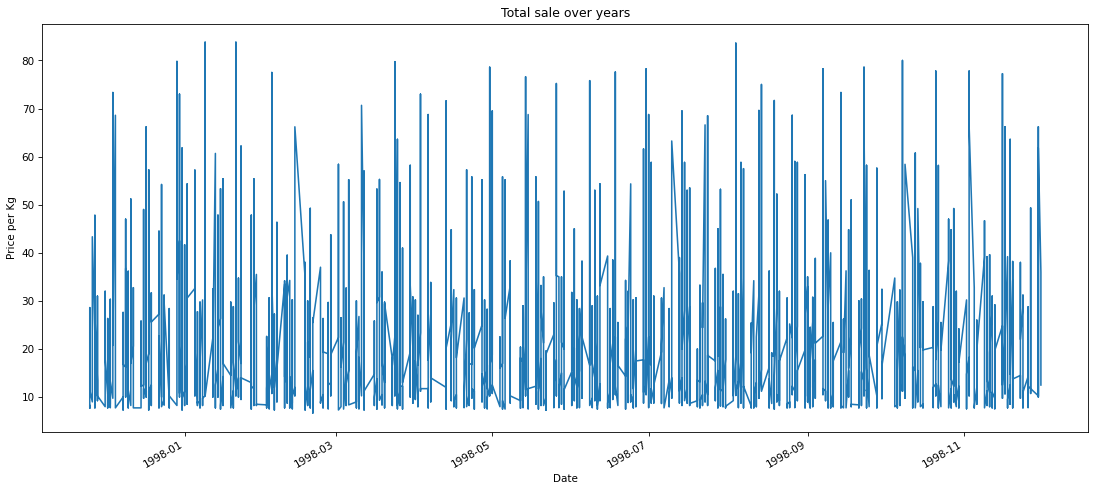

In [561]:
Region['Price per Kg'].plot()
plt.xlabel('Date')
plt.ylabel('Price per Kg')
plt.title('Total sale over years')
plt.show()

In [562]:
#create new DataFrame
monthly_Region = pd.DataFrame()
print(Region['Price per Kg'])
monthly_Region['Price per Kg'] = Region['Price per Kg'].resample('MS').mean()

Date
1997-11-25     8.25
1997-11-25     7.75
1997-11-25    12.50
1997-11-25     8.50
1997-11-25    11.75
              ...  
1998-11-30    21.40
1998-11-30    61.80
1998-12-01    36.00
1998-12-01    26.50
1998-12-01    12.50
Name: Price per Kg, Length: 4275, dtype: float64


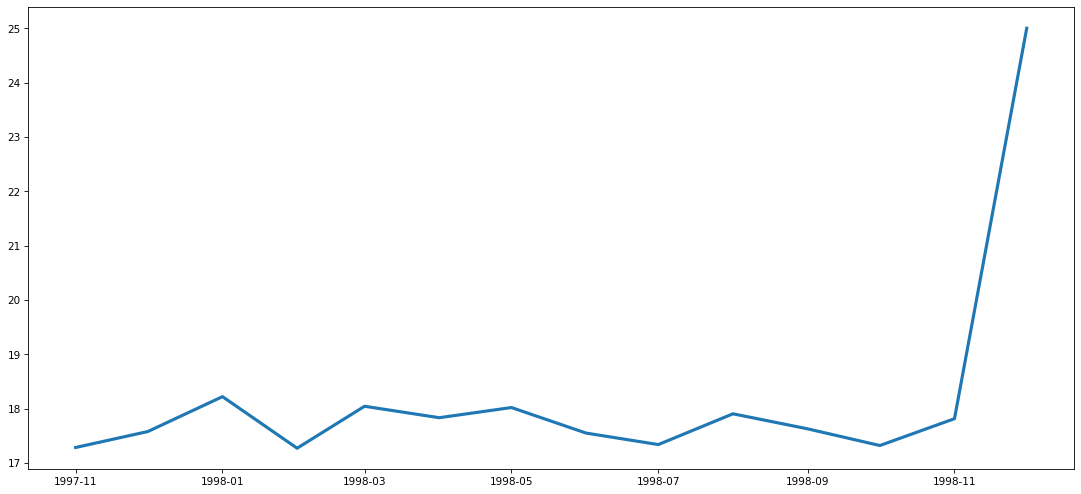

In [563]:
#plot weekly sales data
monthly_Region.values
plt.plot(monthly_Region.index,monthly_Region['Price per Kg'], linewidth=3)

In [564]:
Region['year'] = [d.year for d in Region.index]
Region['month'] = [d.strftime('%b') for d in Region.index]
years= Region['year'].unique()
years

array([1997, 1998])

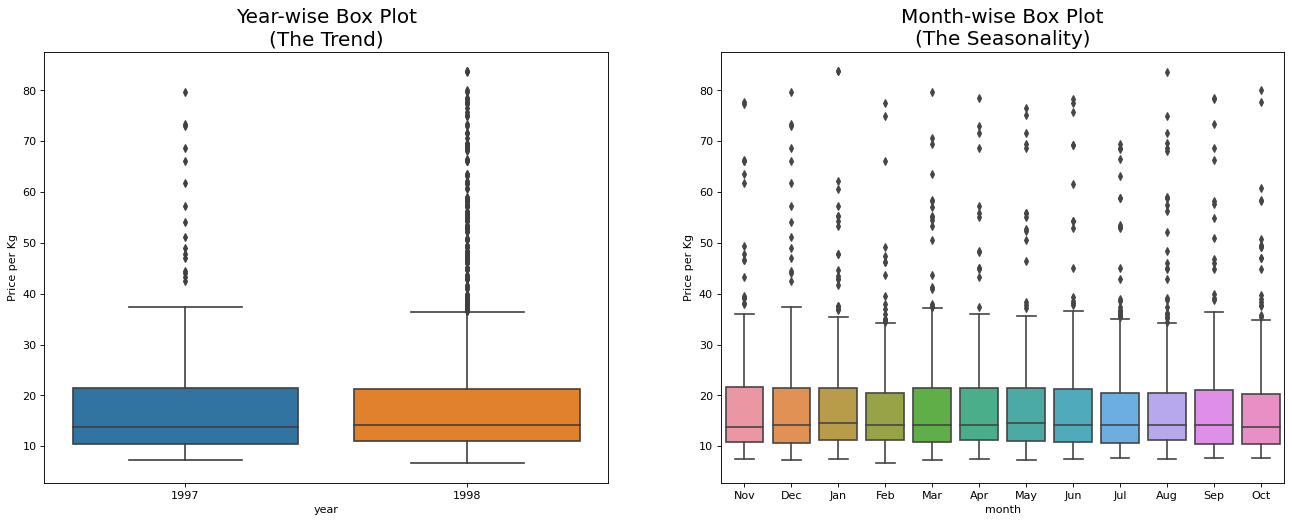

In [565]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Price per Kg', data=Region, ax=axes[0])
sns.boxplot(x='month', y='Price per Kg', data=Region.loc[~Region.year.isin([2014,2917]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

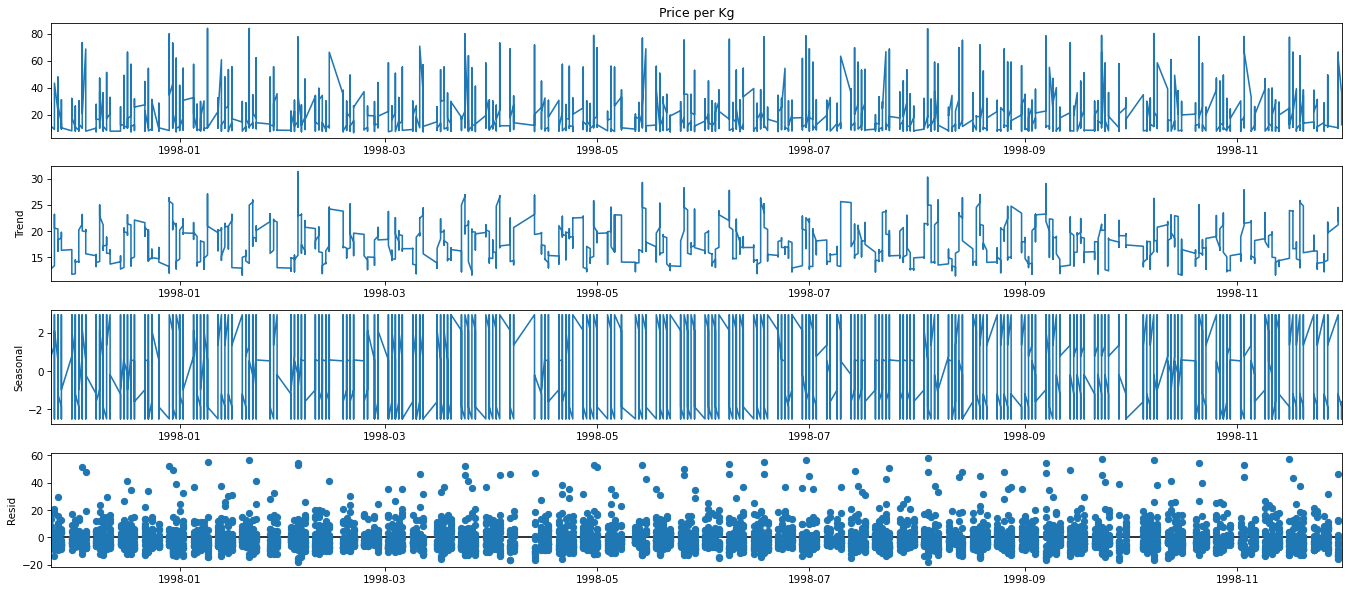

In [573]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(Region['Price per Kg'], model='additive', period=12)
fig = decomposition.plot()
plt.show()

Check Stationary of the Dataset 

In [568]:
#Determing rolling statistics
moving_avg = monthly_Region.rolling(12).mean()
moving_std= monthly_Region.rolling(12).std()


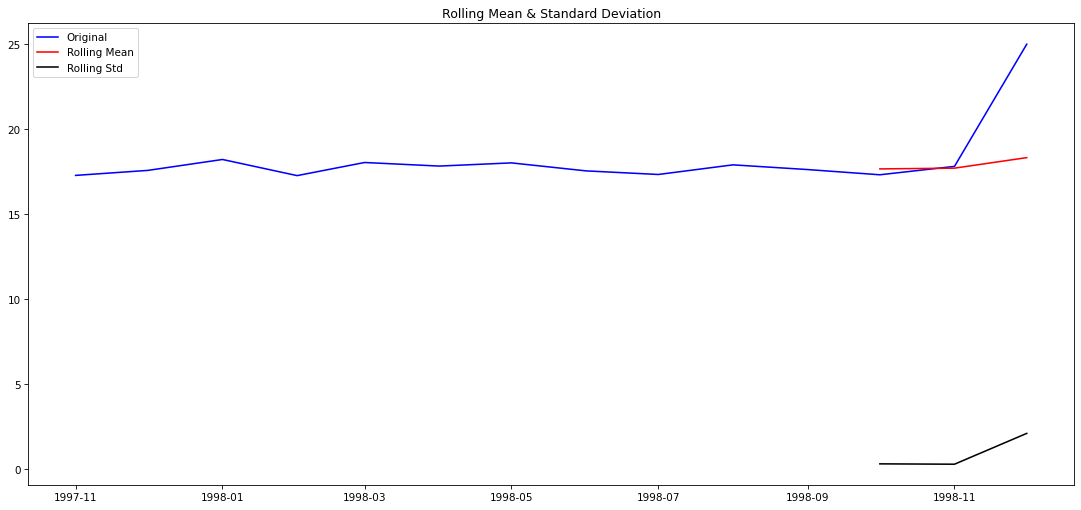

In [569]:
# Plot rolling statistics:
orig = plt.plot(monthly_Region, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [570]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_Region, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.496905
p-value                        0.535042
#Lags Used                     5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64
